<a href="https://colab.research.google.com/github/raissamiranda/Computational-statistical-physics/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo: Como estimar integrais

In [109]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import e
from math import pi
from math import sin

def f1(x): return (1-x**2)
def f2(x): return (e**x)
def f3(x): return (sin(x)**2)
def f4(x1,x2,x3,y1,y2,y3,z1,z2,z3): return 1/((x1+x2)*x3 + (y1+y2)*y3 + (z1+z2)*z3)

def gera_pontos(x1, x2, y2, n):
  xs = [random.uniform(x1,x2) for _ in range(n)]
  ys = [random.uniform(0,y2) for _ in range(n)]
  return xs, ys

## Método 1

In [201]:
def metodo1(a1, a2, f, n):
  x = np.linspace(a1,a2,num=n)

  arr = []
  for i in range(len(x)):
    arr.append(f(x[i]))

  y_max = max(arr)

  xs, ys = gera_pontos(a1,a2,y_max,n)
  n_dentro = 0

  for i in range(n):
    if ((f(xs[i]) > ys[i] and f(xs[i]) > 0)  or  (f(xs[i]) < 0 and f(xs[i]) < ys[i])):
      n_dentro = n_dentro + 1
  return (n_dentro/n) * (a2-a1) * (y_max)

def n1(n,f,a2):
  sum = 0
  arr = []
  for i in range(1000):
    area = metodo1(0,a2,f,n)
    arr.append(area)
    sum = sum + area
  print('N = ' + str(n) + '   ->    ' + str(sum/1000))
  return arr

### $\int_{0}^{1} (1-x)^2$

N = 100   ->    0.6661400000000001
N = 1000   ->    0.6667719999999995
N = 10000   ->    0.6665568


Text(0.5, 1.0, 'N = 10000')

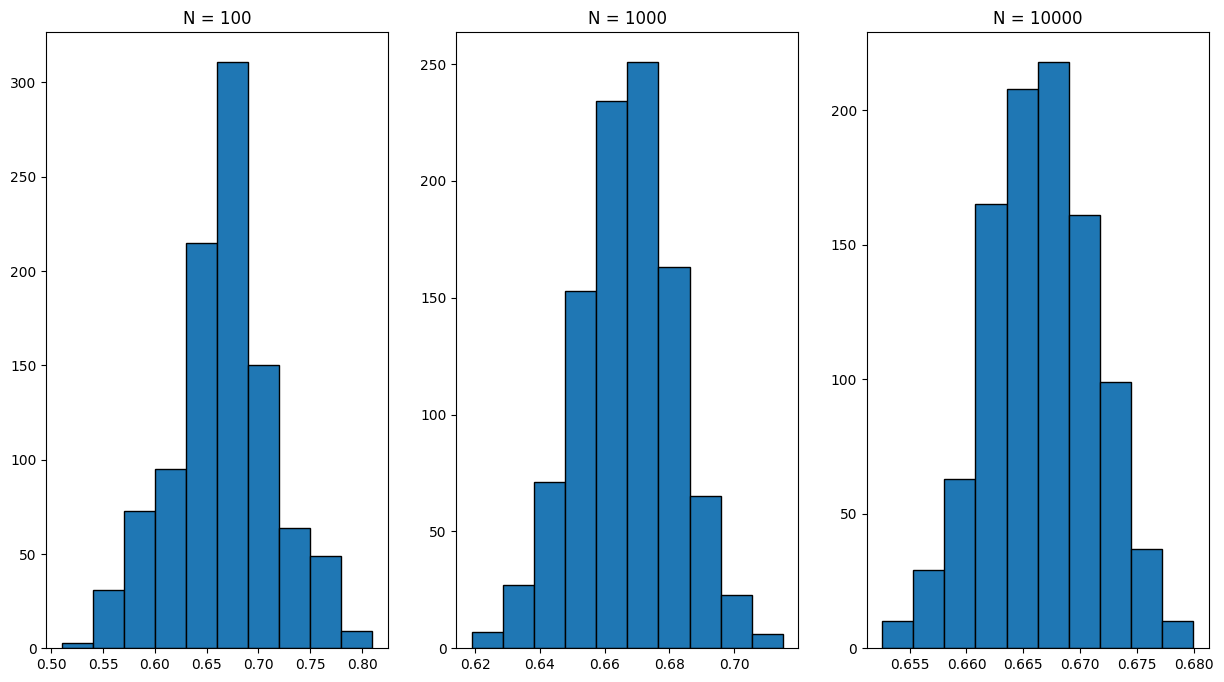

In [196]:
f, axs = plt.subplots(1, 3, figsize=(15,8))

values1 = n1(100,f1,1)
axs[0].hist(values1, edgecolor='k')
axs[0].set_title('N = 100')

values2 = n1(1000,f1,1)
axs[1].hist(values2, edgecolor='k')
axs[1].set_title('N = 1000')

values3 = n1(10000,f1,1)
axs[2].hist(values3, edgecolor='k')
axs[2].set_title('N = 10000')

### $\int_{0}^{1} e^x$

N = 100   ->    1.7234994105161783
N = 1000   ->    1.7178481025948062
N = 10000   ->    1.7182930853301235


Text(0.5, 1.0, 'N = 10000')

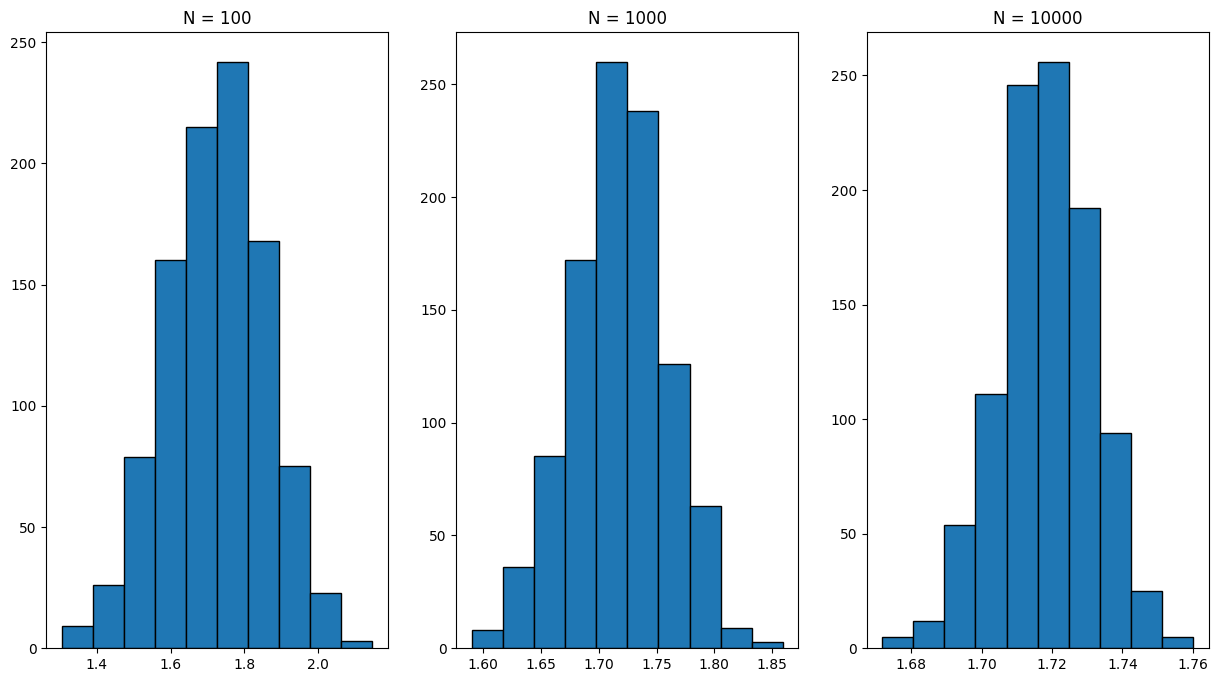

In [197]:
f, axs = plt.subplots(1, 3, figsize=(15,8))

values1 = n1(100,f2,1)
axs[0].hist(values1, edgecolor='k')
axs[0].set_title('N = 100')

values2 = n1(1000,f2,1)
axs[1].hist(values2, edgecolor='k')
axs[1].set_title('N = 1000')

values3 = n1(10000,f2,1)
axs[2].hist(values3, edgecolor='k')
axs[2].set_title('N = 10000')

### $\int_{0}^{\pi} sin^2(x)$

N = 100   ->    1.5659095654986717
N = 1000   ->    1.5723412445993463
N = 10000   ->    1.5715279649402616


Text(0.5, 1.0, 'N = 10000')

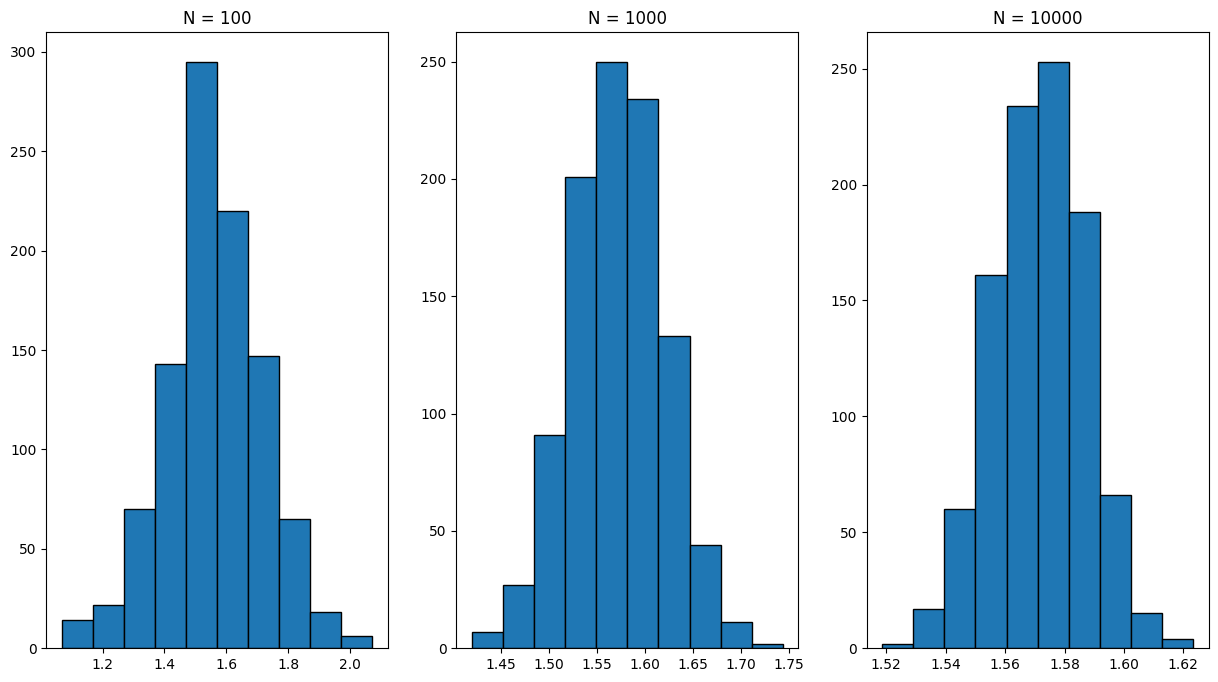

In [200]:
f, axs = plt.subplots(1, 3, figsize=(15,8))

values1 = n1(100,f3,pi)
axs[0].hist(values1, edgecolor='k')
axs[0].set_title('N = 100')

values2 = n1(1000,f3,pi)
axs[1].hist(values2, edgecolor='k')
axs[1].set_title('N = 1000')

values3 = n1(10000,f3,pi)
axs[2].hist(values3, edgecolor='k')
axs[2].set_title('N = 10000')

## Metodo 2

In [203]:
def metodo2(a1, a2, f, n):
  x = [random.uniform(a1,a2) for _ in range(n)]
  sum = 0

  for i in range(n):
    sum = sum + f(x[i])

  return (a2 - a1)/n * sum

def n2(n,f,a2):
  sum = 0
  arr = []
  for i in range(1000):
    area = metodo2(0,a2,f,n)
    arr.append(area)
    sum = sum + area
  print('N = ' + str(n) + '   ->    ' + str(sum/1000))
  return arr

### $\int_{0}^{1} (1-x)^2$

N = 100   ->    0.6672486820268733
N = 1000   ->    0.667374207654772
N = 10000   ->    0.6666067131472492


Text(0.5, 1.0, 'N = 10000')

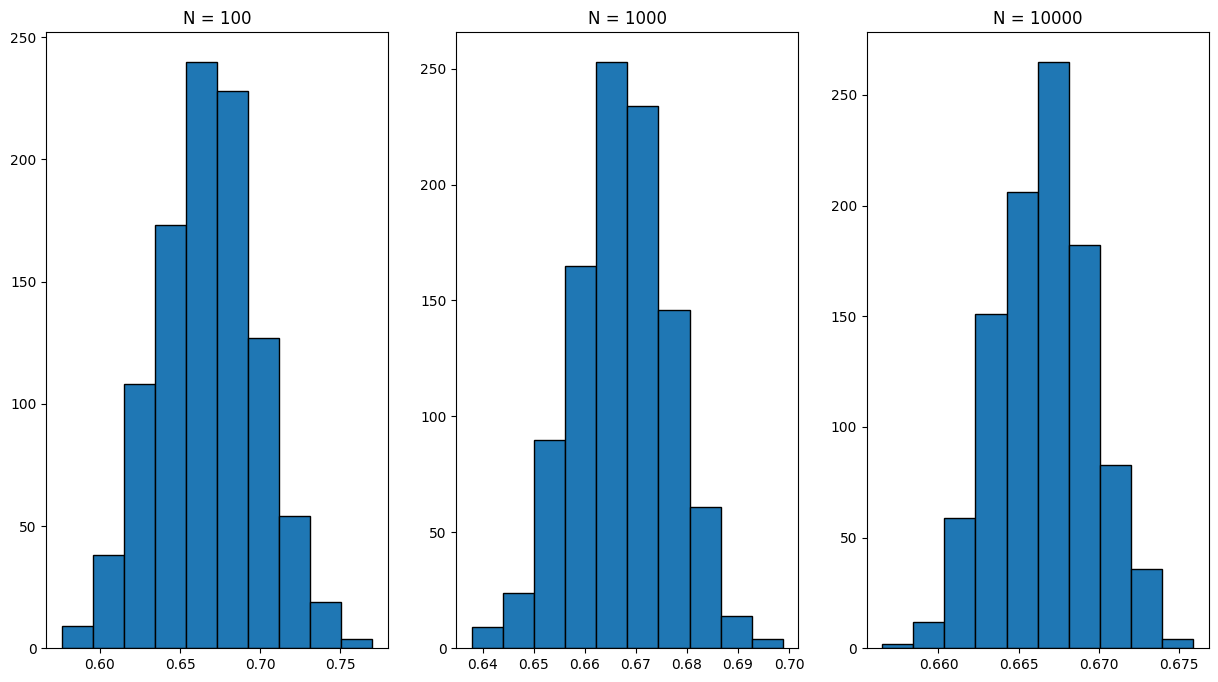

In [204]:
f, axs = plt.subplots(1, 3, figsize=(15,8))

values1 = n2(100,f1,1)
axs[0].hist(values1, edgecolor='k')
axs[0].set_title('N = 100')

values2 = n2(1000,f1,1)
axs[1].hist(values2, edgecolor='k')
axs[1].set_title('N = 1000')

values3 = n2(10000,f1,1)
axs[2].hist(values3, edgecolor='k')
axs[2].set_title('N = 10000')

### $\int_{0}^{1} e^x$

N = 100   ->    1.7167425558703315
N = 1000   ->    1.7186321821052242
N = 10000   ->    1.718234463636374


Text(0.5, 1.0, 'N = 10000')

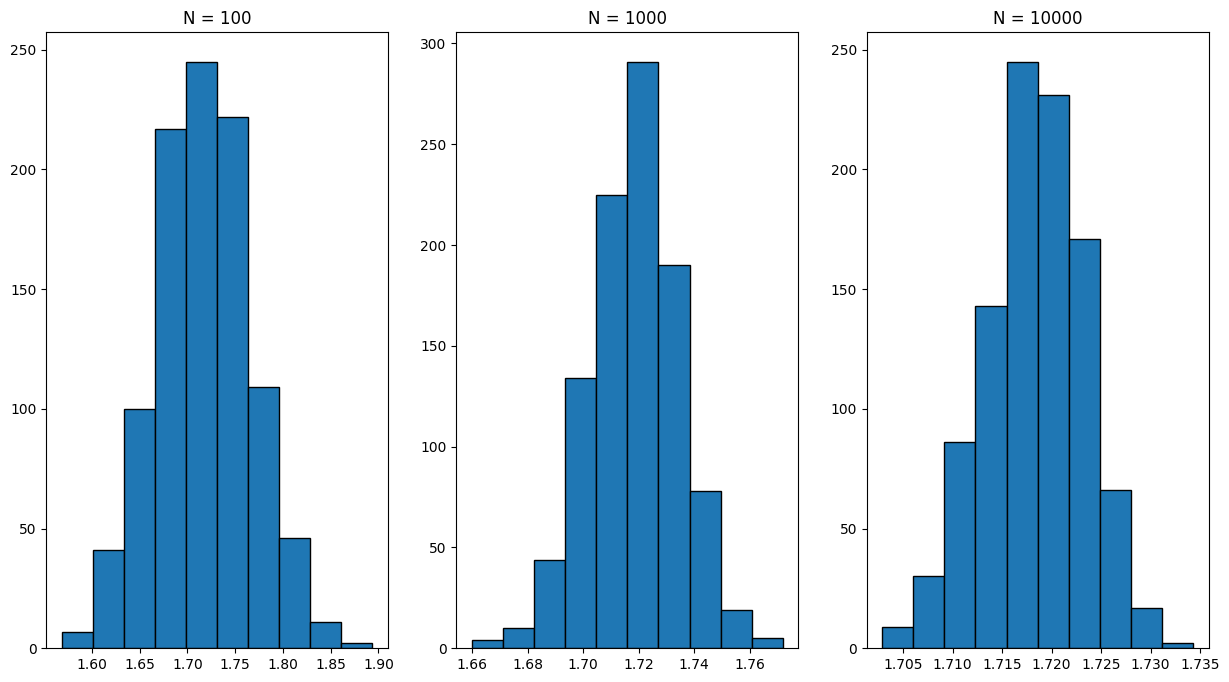

In [205]:
f, axs = plt.subplots(1, 3, figsize=(15,8))

values1 = n2(100,f2,1)
axs[0].hist(values1, edgecolor='k')
axs[0].set_title('N = 100')

values2 = n2(1000,f2,1)
axs[1].hist(values2, edgecolor='k')
axs[1].set_title('N = 1000')

values3 = n2(10000,f2,1)
axs[2].hist(values3, edgecolor='k')
axs[2].set_title('N = 10000')

### $\int_{0}^{\pi} sin^2(x)$

N = 100   ->    1.5663380921917247
N = 1000   ->    1.5718186992014571
N = 10000   ->    1.5711547918641424


Text(0.5, 1.0, 'N = 10000')

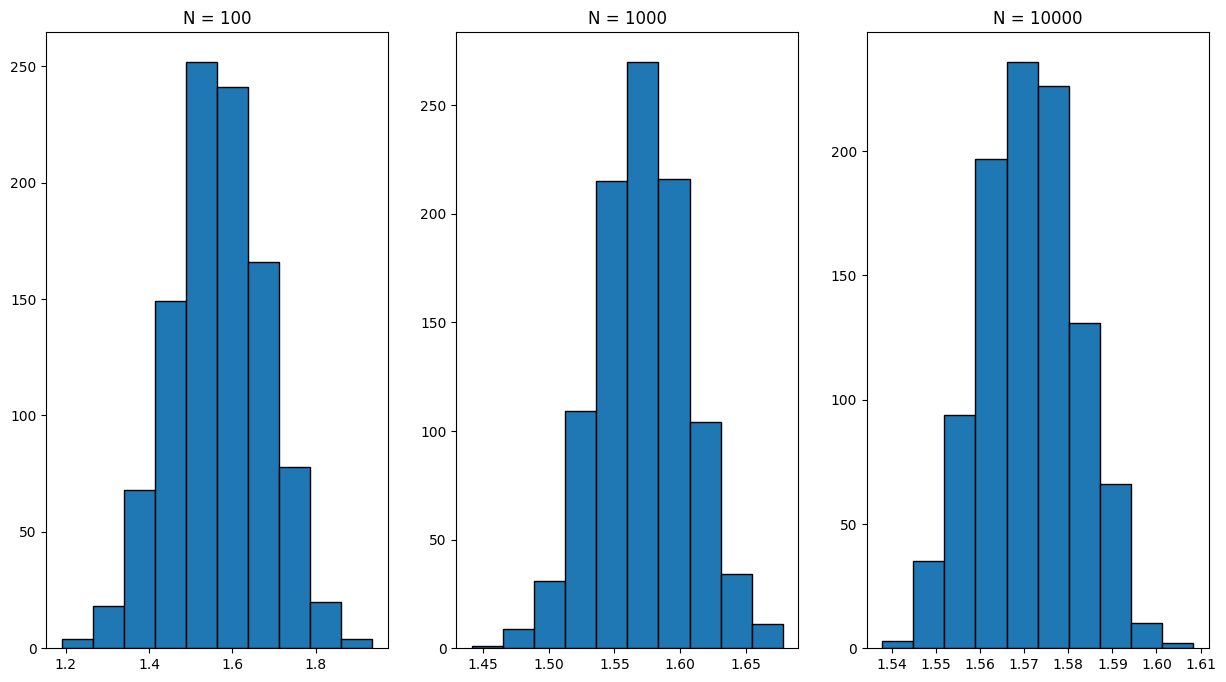

In [206]:
f, axs = plt.subplots(1, 3, figsize=(15,8))

values1 = n2(100,f3,pi)
axs[0].hist(values1, edgecolor='k')
axs[0].set_title('N = 100')

values2 = n2(1000,f3,pi)
axs[1].hist(values2, edgecolor='k')
axs[1].set_title('N = 1000')

values3 = n2(10000,f3,pi)
axs[2].hist(values3, edgecolor='k')
axs[2].set_title('N = 10000')

## Integrais múltiplas


### $\int_{0}^{1} ... \int_{0}^{1} = \frac{1}{((x{1} + x_{2})x_{3} + (y_{1}+y_{2})y_{3}) + (z_{1}+z_{2})z_{3})} dx_{1}dy_{1}dz_{1}dx_{2}dy_{2}dz_{2}dx_{3}dy_{3}dz_{3}$ 

In [171]:
def integrais_multiplas(n):

  x1 = [random.uniform(0,1) for _ in range(n)]
  x2 = [random.uniform(0,1) for _ in range(n)]
  x3 = [random.uniform(0,1) for _ in range(n)]
  y1 = [random.uniform(0,1) for _ in range(n)]
  y2 = [random.uniform(0,1) for _ in range(n)]
  y3 = [random.uniform(0,1) for _ in range(n)]
  z1 = [random.uniform(0,1) for _ in range(n)]
  z2 = [random.uniform(0,1) for _ in range(n)]
  z3 = [random.uniform(0,1) for _ in range(n)]

  sum = 0

  for i in range(n):
    sum = sum + f4(x1[i],x2[i],x3[i],y1[i],y2[i],y3[i],z1[i],z2[i],z3[i])

  return sum/n


sum = 0
for i in range(1000):
  sum = sum + integrais_multiplas(1000)
print(sum/1000) 

0.8637110087937399
